In [1]:
#
import tensorflow as tf
print(tf.__version__)

import pandas as pd
import io

import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import random
import itertools
import keras
from scipy.sparse.linalg import lsmr
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr

import matplotlib
import matplotlib.font_manager as fm
# Set font properties for plots

import importlib

import regressionTools as rt
importlib.reload(rt)
from regressionTools import aa_to_idx,aa_to_idx_stop

import dataTools as dt
importlib.reload(dt)

### get the right plt style
plt.style.use('/n/groups/marks/users/david/github/pareSingleLibrary2/codebase/src/paper_style1.mplstyle')

## adding the arial font that had to be downloaded
# following this: https://betterdatascience.com/python-matplotlib-fonts/
import matplotlib.font_manager as font_manager

# Add every font at the specified location
font_dir = ['/n/groups/marks/users/david/github/pareSingleLibrary2/codebase/src/fonts/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

font_manager.findfont('arial') # font_manager.findfont('Arial') doesn't work
from matplotlib import rcParams
rcParams['font.family'] = 'arial'

from os import listdir
from os.path import isfile


2.7.0


In [2]:

dout = '/n/groups/marks/users/david/ex62/out/'


# linear and logistic regression

## antitoxin 3 position

In [3]:

x, y, df_at_3p = dt.get_x_y_at_3p()
print(x.shape)

(8000, 61)


(61, 1)
layer0 weights set to:  [[ 0.08320744]
 [-0.06141881]
 [ 0.48644865]
 [ 0.22274233]
 [-0.06017357]]
beta_hat [ 0.08320745 -0.06141881  0.48644865  0.22274233 -0.06017357]


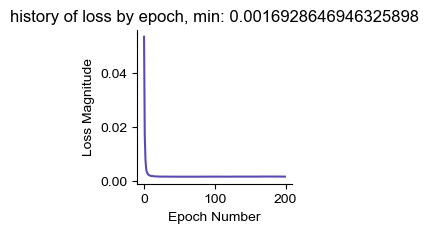

In [12]:

model_3p, history, callbacks =rt.fit_log_model(x, y, 
                                        my_layer=rt.log_layer(1),
                                        adam_lr =0.1, 
                                         epochs=200,
                                         batch_size=1000)

Yhat_3pos_non= model_3p.predict(x).flatten()

var explained 0.9761818891571196
mse 0.0016832320700073194
pearsonr 0.9882190353737067
spearmanr 0.9864133601270748


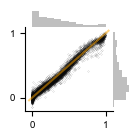

0.0016832320700073194
0.9761818891571196


In [7]:

rt.plot_corr_marginal(Yhat_3pos_non, y, 
                   figsize=(1.5,1.5),ticksize=7,
                   s=0.01, alpha=0.6,
                   c='grey',
                  fout = dout + 'pos3_nonlin_pred'
                  )

mse= rt.get_mse(Yhat_3pos_non, y)
print(mse)
print(rt.get_var_explain(Yhat_3pos_non, y))

(8000, 61) (8000,)
var explained 0.8738869680012681
mse 0.008912440676191454
pearsonr 0.9348192167479593
spearmanr 0.9552140494509889


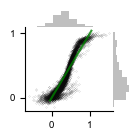

0.008912440676191454
0.8738869680012681


In [10]:


yhat_lin_3pos =rt.calc_lin_reg(x,y)

rt.plot_corr_marginal(yhat_lin_3pos, y, 
                   figsize=(1.5,1.5),ticksize=7,
                   s=0.01, alpha=0.6,
                   c='grey',
                  fout = dout + 'pos3_lin_pred',
                  diag_col ='green',
                   diag_alpha=0.8
                  )

print(rt.get_mse(yhat_lin_3pos, y))
print(rt.get_var_explain(yhat_lin_3pos, y))

## at 10 position

In [13]:
# loading the toxin-antitoxin data

x,y, df_at_10p = dt.get_x_y_at_10p()
print(x.shape)

(8038, 201)


(201, 1)
layer0 weights set to:  [[ 0.01701156]
 [-0.01035653]
 [ 0.03116564]
 [ 0.00747865]
 [-0.03876103]]
beta_hat [ 0.01701156 -0.01035653  0.03116564  0.00747865 -0.03876103]


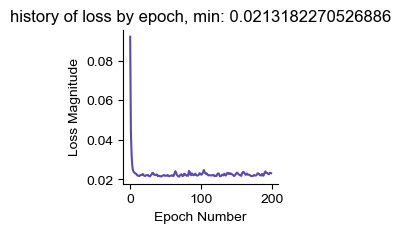

In [14]:
# renormed
model_10p, history, callbacks = rt.fit_log_model(
    x,y, 
    my_layer=rt.log_layer(1), # do not scale, just predict between 0 and 1
    adam_lr =0.1, 
    epochs=200,
    batch_size=1000)

Yhat_non_10pos= model_10p.predict(x).flatten()


var explained 0.834556563118711
mse 0.021090115043981957
pearsonr 0.9144123121475116
spearmanr 0.7916202802228693


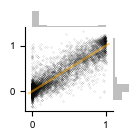

0.021090115043981957
0.834556563118711


In [15]:
rt.plot_corr_marginal(Yhat_non_10pos, y, 
                   figsize=(1.5,1.5),ticksize=7,
                   s=0.01, alpha=0.6,
                   c='grey',
                  fout = dout + 'pos10_nonlin_pred'
                  )
print(rt.get_mse(Yhat_non_10pos, y))
print(rt.get_var_explain(Yhat_non_10pos, y))

(8038, 201) (8038,)
var explained 0.6675191100631788
mse 0.04238342935129208
pearsonr 0.817018427003442
spearmanr 0.7638615914095697


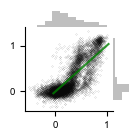

0.04238342935129208
0.6675191100631788


In [16]:

yhat_lin_10pos =rt.calc_lin_reg(x,y)

rt.plot_corr_marginal(yhat_lin_10pos, y, 
                   figsize=(1.5,1.5),ticksize=7,
                   s=0.01, alpha=0.6,
                   c='grey',
                  fout = dout + 'pos10_lin_pred',
                  diag_col ='green',
                   diag_alpha=0.8
                  )

print(rt.get_mse(yhat_lin_10pos, y))
print(rt.get_var_explain(yhat_lin_10pos, y))

## pabp

In [21]:
df_pabp = dt.load_pabp()
x,y = dt.get_x_y_pabp(df_pabp)

reindexed using min pos: 126
# unique single muts 1064
(36521, 1140)


(1140, 1)
layer0 weights set to:  [[ 0.5584487 ]
 [ 0.05381601]
 [-0.598722  ]
 [ 0.19078839]
 [-0.20149551]]
beta_hat [ 0.55844868  0.05381601 -0.59872197  0.19078838 -0.20149551]


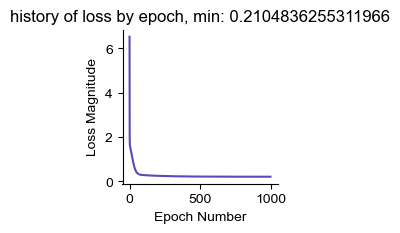

In [22]:
model_pabp, history, callbacks = rt.fit_log_model(x, y, 
                                      my_layer=rt.log_layer_scale_shift(1),
                                      adam_lr =0.0005,
                                      epochs=1000,
                                      batch_size=1000)

var explained 0.8760296513811242
mse 0.21018674667032833
pearsonr 0.9359796324244831
spearmanr 0.9239623333780217


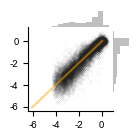

0.21018674667032833
0.8760296513811242


In [30]:
Yhat_non_pabp= model_pabp.predict(x).flatten()

rt.plot_corr_marginal(Yhat_non_pabp, y, 
                   figsize=(1.5,1.5),ticksize=7,
                   s=0.001, alpha=0.6,
                   c='grey',
                   fout = dout + 'pabp_nonlin_pred',
                    xticks= [-6, -4, -2, 0],
                    yticks= [-6, -4, -2, 0],
                  )
print(rt.get_mse(Yhat_non_pabp, y))
print(rt.get_var_explain(Yhat_non_pabp, y))

(36521, 1140) (36521,)
var explained 0.8478389495908882
mse 0.25798294924340814
pearsonr 0.9207817057212253
spearmanr 0.9216372779794212


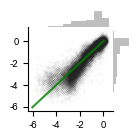

0.25798294924340814
0.8478389495908882


In [31]:
yhat_lin_pabp =rt.calc_lin_reg(x,y)

rt.plot_corr_marginal(yhat_lin_pabp, y,
                   figsize=(1.5,1.5),ticksize=7,
                   s=0.001, alpha=0.6,
                   c='grey',
                  fout = dout + 'pabp_lin_pred',
                  diag_col ='green',
                   diag_alpha=0.8, 
                    xticks= [-6, -4, -2, 0],
                    yticks= [-6, -4, -2, 0],
                  )

print(rt.get_mse(yhat_lin_pabp, y))
print(rt.get_var_explain(yhat_lin_pabp, y))

## aav

In [32]:
df_aav = dt.load_df_aav()
x,y = dt.get_x_y_aav(df_aav)

532 individual mutants seen out of possible 560
# unique single muts 532
(46093, 561)


(561, 1)
layer0 weights set to:  [[ 0.06787972]
 [-0.04128031]
 [-0.00559031]
 [-0.96571743]
 [-0.7064827 ]]
beta_hat [ 0.06787972 -0.04128031 -0.00559031 -0.96571744 -0.7064827 ]


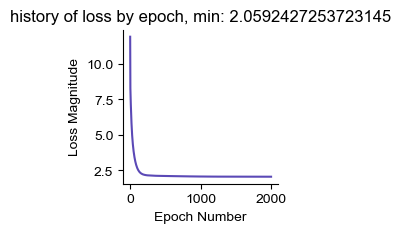

In [33]:
model_aav, history, callbacks = rt.fit_log_model(x, y, 
                                      my_layer=rt.log_layer_scale_shift(1),
                                      adam_lr =0.0005,
                                      epochs=2000,
                                      batch_size=1000)

var explained 0.778590923809112
mse 2.059242367028138
pearsonr 0.8824046128732745
spearmanr 0.8696890789144466


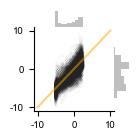

2.059242367028138
0.778590923809112


In [34]:
Yhat_non_aav = model_aav.predict(x).flatten()

rt.plot_corr_marginal(Yhat_non_aav, y, 
                   figsize=(1.5,1.5),ticksize=7,
                   s=0.001, alpha=0.6,
                   c='grey',
                   fout = dout + 'aav_nonlin_pred',
                    xticks= [-10, 0, 10],
                    yticks= [-10, 0, 10],
                  )
print(rt.get_mse(Yhat_non_aav, y))
print(rt.get_var_explain(Yhat_non_aav, y))

(46093, 561) (46093,)
var explained 0.5870601182305716
mse 3.840598200419177
pearsonr 0.7661984848788019
spearmanr 0.8205030146493661


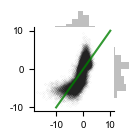

3.840598200419177
0.5870601182305716


In [35]:
yhat_lin_aav =rt.calc_lin_reg(x,y)

rt.plot_corr_marginal(yhat_lin_aav, y,
                    figsize=(1.5,1.5),ticksize=7,
                    s=0.001, alpha=0.6,
                    c='grey',
                    fout = dout + 'aav_lin_pred',
                    diag_col ='green',
                    diag_alpha=0.8, 
                    xticks= [-10, 0, 10],
                    yticks= [-10, 0, 10],
                  )

print(rt.get_mse(yhat_lin_aav, y))
print(rt.get_var_explain(yhat_lin_aav, y))

## gfp

In [36]:
df_gfp = dt.load_df_gfp()
x,y = dt.get_x_y_gfp(df_gfp)

# unique single muts 1810
2
236
238
(51714, 2044)


(2044, 1)
layer0 weights set to:  [[-0.35998872]
 [-0.24630012]
 [-0.26415494]
 [-0.06855825]
 [-0.4152786 ]]
beta_hat [-0.35998872 -0.24630012 -0.26415495 -0.06855826 -0.41527861]


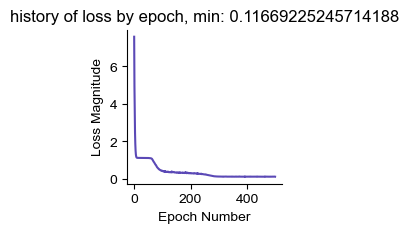

In [37]:
model_gfp, history, callbacks = rt.fit_log_model(x, y, 
                                      my_layer=rt.log_layer_scale_shift(1),
                                      adam_lr =0.005,
                                      epochs=500,
                                      batch_size=1000)

var explained 0.898237991057323
mse 0.11403014700962638
pearsonr 0.947756993463913
spearmanr 0.874965614420797


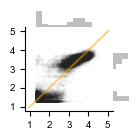

0.11403014700962638
0.898237991057323


In [38]:
Yhat_non_gfp = model_gfp.predict(x).flatten()

rt.plot_corr_marginal(Yhat_non_gfp, y, 
                   figsize=(1.5,1.5),ticksize=7,
                   s=0.001, alpha=0.6,
                   c='grey',
                   fout = dout + 'gfp_nonlin_pred',
                    xticks= [1,2,3,4,5],
                    yticks= [1,2,3,4,5],
                  )
print(rt.get_mse(Yhat_non_gfp, y))
print(rt.get_var_explain(Yhat_non_gfp, y))

var explained 0.7188917902281364
mse 0.31499781518616754
pearsonr 0.8478748670813023
spearmanr 0.8683078608958653


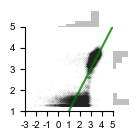

0.31499781518616754
0.7188917902281364


In [47]:
yhat_lin_gfp =rt.calc_lin_reg(x,y)

rt.plot_corr_marginal(yhat_lin_gfp, y,
                    figsize=(1.5,1.5),ticksize=7,
                    s=0.001, alpha=0.6,
                    c='grey',
                    fout = dout + 'gfp_lin_pred',
                    diag_col ='green',
                    diag_alpha=0.8, 
                    xticks= [-3, -2, -1,0,1,2,3,4,5],
                    yticks= [1,2,3,4,5],
                      xlim = [-3,5], 
                      ylim = [1,5]
                  )

print(rt.get_mse(yhat_lin_gfp, y))
print(rt.get_var_explain(yhat_lin_gfp, y))

## gb1

In [3]:
x,y,df_gb1 = dt.get_x_y_gb1()

(536963, 1156)


(1156, 1)
layer0 weights set to:  [[-0.05585995]
 [-0.33324194]
 [-0.3980995 ]
 [-0.3509762 ]
 [ 0.06537113]]
beta_hat [-0.05585995 -0.33324195 -0.39809953 -0.35097618  0.06537112]


2023-06-13 15:59:26.564977: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2482916912 exceeds 10% of free system memory.


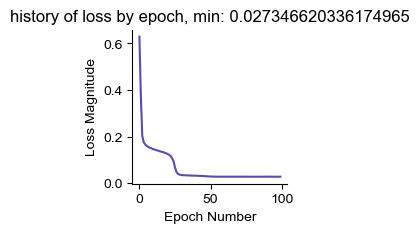

In [9]:
model_gb1, history, callbacks = rt.fit_log_model(x, y, 
                                      my_layer=rt.log_layer_scale_shift(1),
                                      adam_lr =0.005,
                                      epochs=100,
                                      batch_size=1000)

In [7]:
# stalls on O2, so reload the trained model from file.
model = tf.keras.Sequential([rt.log_layer_scale_shift(1)])
checkpoint_filepath = './tmp/gb1_all/checkpoint'
model.load_weights(checkpoint_filepath)
Yhat_non_gb1 = model.predict(x).flatten()


var explained 0.9444358789261265
mse 0.026878546612600026
pearsonr 0.9718288065947621
spearmanr 0.9582612933064562


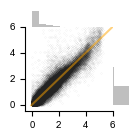

0.026878546612600026
0.9444358789261265


In [13]:

rt.plot_corr_marginal(Yhat_non_gb1, y, 
                    figsize=(1.5,1.5),ticksize=7,
                    s=0.001, alpha=0.6,
                    c='grey',
                    fout = dout + 'gb1_nonlin_pred',
                    xticks= [0,2,4,6],
                    yticks= [0,2,4,6],
                    xlim = [-0.5,6],
                    ylim = [-0.5,6]
                  )
print(rt.get_mse(Yhat_non_gb1, y))
print(rt.get_var_explain(Yhat_non_gb1, y))

In [ ]:
# memory issues.
'''
yhat_lin_gb1 =rt.calc_lin_reg(x,y)

rt.plot_corr_marginal(yhat_lin_gb1, y,
                    figsize=(1.5,1.5),ticksize=7,
                    s=0.001, alpha=0.6,
                    c='grey',
                    fout = dout + 'gb1_lin_pred',
                    diag_col ='green',
                    diag_alpha=0.8, 
                    xticks= [0,2,4,6],
                    yticks= [0,2,4,6],
                    xlim = [-0.5,6],
                    ylim = [-0.5,6]
                  )

print(rt.get_mse(yhat_lin_gb1, y))
print(rt.get_var_explain(yhat_lin_gb1, y))
'''

(536963, 1156) (536963,)


## grb2

In [3]:
x,y,df_grb2 = dt.get_x_y_grb2()

(63367, 1177)


2023-06-13 15:23:12.914047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /n/app/gcc/6.2.0/lib64:/n/app/gcc/6.2.0/lib
2023-06-13 15:23:12.914160: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-13 15:23:12.914211: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (compute-e-16-230.o2.rc.hms.harvard.edu): /proc/driver/nvidia/version does not exist
2023-06-13 15:23:12.916600: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1177, 1)
layer0 weights set to:  [[-0.35951114]
 [-0.20802987]
 [-0.21686162]
 [-0.29247126]
 [-0.16910848]]
beta_hat [-0.35951114 -0.20802987 -0.21686162 -0.29247127 -0.16910848]


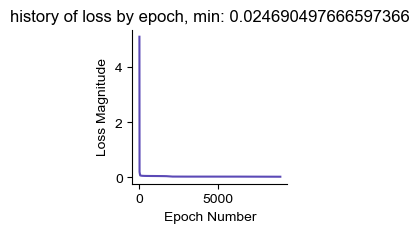

In [4]:
model_grb2, history, callbacks = rt.fit_log_model(x, y, 
                                      my_layer=rt.log_layer_scale_shift(1),
                                      adam_lr =0.0005,
                                      epochs=9000,
                                      batch_size=1000)

var explained 0.8868286425322154
mse 0.02471305943218154
pearsonr 0.9418121974743336
spearmanr 0.8791771519822668


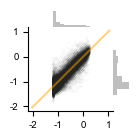

0.02471305943218154
0.8868286425322154


In [6]:
Yhat_non_grb2 = model_grb2.predict(x).flatten()

rt.plot_corr_marginal(Yhat_non_grb2, y, 
                   figsize=(1.5,1.5),ticksize=7,
                   s=0.001, alpha=0.6,
                   c='grey',
                   fout = dout + 'grb2_nonlin_pred',
                    xticks= [-2, -1,0,1],
                    yticks= [-2, -1,0,1],
                  )
print(rt.get_mse(Yhat_non_grb2, y))
print(rt.get_var_explain(Yhat_non_grb2, y))

(63367, 1177) (63367,)
var explained 0.7651896125405583
mse 0.051275191801340755
pearsonr 0.8747511717857588
spearmanr 0.8691446670896551


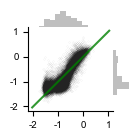

0.051275191801340755
0.7651896125405583


In [7]:
yhat_lin_grb2 =rt.calc_lin_reg(x,y)

rt.plot_corr_marginal(yhat_lin_grb2, y,
                    figsize=(1.5,1.5),ticksize=7,
                    s=0.001, alpha=0.6,
                    c='grey',
                    fout = dout + 'grb2_lin_pred',
                    diag_col ='green',
                    diag_alpha=0.8, 
                    xticks= [-2, -1,0,1],
                    yticks= [-2, -1,0,1],
                  )

print(rt.get_mse(yhat_lin_grb2, y))
print(rt.get_var_explain(yhat_lin_grb2, y))

# misc

In [18]:
# to print the data description
# GFP
X = np.stack(list(df_gfp['oh_code'].values), axis=0)
X= np.c_[X,np.ones(X.shape[0])]
print(X.shape)
df_gfp['hamming'] = df_gfp.apply(lambda r: len(r.mutant.split(':')), axis=1)
print(np.mean(df_gfp.hamming))
max(df_gfp.hamming)

(51714, 4999)
3.8780020884093283


15